In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

# Define a simple neural network architecture with dropout
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.dropout = nn.Dropout(0.5)  # Dropout layer with 50% dropout probability
        self.fc2 = nn.Linear(100, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        #x = self.dropout(x)  # Apply dropout after activation
        x = self.fc2(x)
        return x

# Generate synthetic data for function fitting (sine wave)
#torch.manual_seed(42)
x_train = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y_train = torch.sin(x_train * 2 * 3.1416) + 0.1 * torch.randn(x_train.size())

# Create an instance of the neural network
model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store data for visualization
losses = []

# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss for visualization
    losses.append(loss.item())

    # Print progress
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Set model to evaluation mode for dropout inference
model.eval()

# Number of Monte Carlo samples for uncertainty estimation
num_samples = 100

# Perform Monte Carlo dropout inference for uncertainty estimation
predictions = []
with torch.no_grad():
    for _ in range(num_samples):
        outputs = model(x_train)
        predictions.append(outputs.detach().numpy())

# Calculate mean and standard deviation of predictions
mean_prediction = predictions.mean(dim=0)
stddev_prediction = predictions.std(dim=0)

print(stddev_prediction)

# Convert tensors to numpy arrays for visualization
x_train_np = x_train.numpy()
y_train_np = y_train.numpy()
mean_prediction_np = mean_prediction.numpy()
stddev_prediction_np = stddev_prediction.numpy()

# Plot original data, model predictions, and uncertainty bounds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train_np[:, 0], y=y_train_np[:, 0], label='Original Data')
sns.lineplot(x=x_train_np[:, 0], y=mean_prediction_np, color='red', label='Mean Prediction')
plt.fill_between(x_train_np[:, 0], mean_prediction_np - 2 * stddev_prediction_np,
                 mean_prediction_np + 2 * stddev_prediction_np, color='lightgray', label='Uncertainty Bounds')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Fitting with Dropout (Uncertainty Estimation)')
plt.legend()
plt.show()

Epoch [100/2000], Loss: 0.3792
Epoch [200/2000], Loss: 0.2834
Epoch [300/2000], Loss: 0.2032
Epoch [400/2000], Loss: 0.1488
Epoch [500/2000], Loss: 0.1123
Epoch [600/2000], Loss: 0.0866
Epoch [700/2000], Loss: 0.0679
Epoch [800/2000], Loss: 0.0541
Epoch [900/2000], Loss: 0.0436
Epoch [1000/2000], Loss: 0.0357
Epoch [1100/2000], Loss: 0.0300
Epoch [1200/2000], Loss: 0.0256
Epoch [1300/2000], Loss: 0.0219
Epoch [1400/2000], Loss: 0.0192
Epoch [1500/2000], Loss: 0.0169
Epoch [1600/2000], Loss: 0.0150
Epoch [1700/2000], Loss: 0.0137
Epoch [1800/2000], Loss: 0.0127
Epoch [1900/2000], Loss: 0.0120
Epoch [2000/2000], Loss: 0.0114


AttributeError: 'list' object has no attribute 'mean'

Epoch [100/2000], Loss: 0.2197
Epoch [200/2000], Loss: 0.1208
Epoch [300/2000], Loss: 0.0764
Epoch [400/2000], Loss: 0.0568
Epoch [500/2000], Loss: 0.0377
Epoch [600/2000], Loss: 0.0398
Epoch [700/2000], Loss: 0.0463
Epoch [800/2000], Loss: 0.0430
Epoch [900/2000], Loss: 0.0388
Epoch [1000/2000], Loss: 0.0500
Epoch [1100/2000], Loss: 0.0397
Epoch [1200/2000], Loss: 0.0354
Epoch [1300/2000], Loss: 0.0319
Epoch [1400/2000], Loss: 0.0285
Epoch [1500/2000], Loss: 0.0241
Epoch [1600/2000], Loss: 0.0253
Epoch [1700/2000], Loss: 0.0255
Epoch [1800/2000], Loss: 0.0335
Epoch [1900/2000], Loss: 0.0245
Epoch [2000/2000], Loss: 0.0191


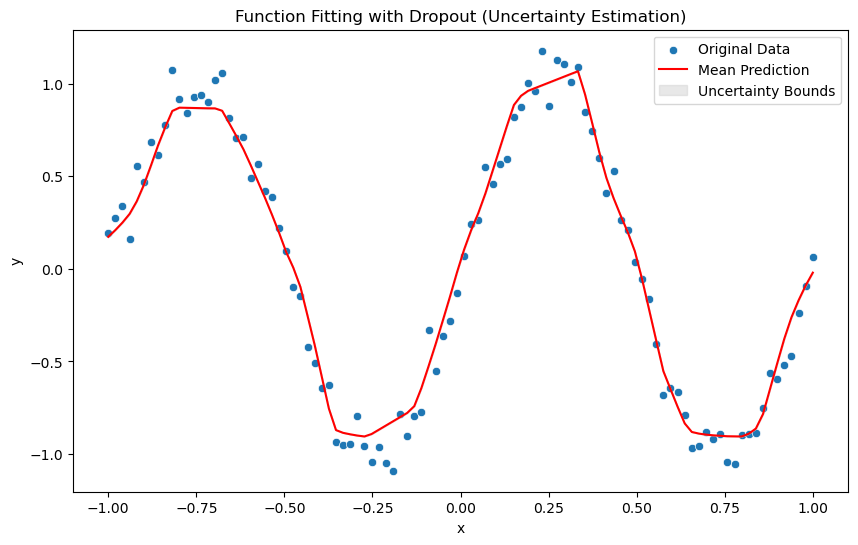

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

# Define a neural network architecture with dropout for uncertainty estimation
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Generate synthetic data for function fitting (sine wave)
torch.manual_seed(42)
x_train = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y_train = torch.sin(x_train * 2 * 3.1416) + 0.1 * torch.randn(x_train.size())

# Create an instance of the neural network
model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store data for visualization
losses = []

# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss for visualization
    losses.append(loss.item())

    # Print progress
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Set model to evaluation mode for dropout inference
model.eval()

# Number of Monte Carlo samples for uncertainty estimation
num_samples = 100

# Perform Monte Carlo dropout inference for uncertainty estimation
predictions = torch.zeros((num_samples, len(x_train)))
for i in range(num_samples):
    with torch.no_grad():
        predictions[i] = model(x_train).squeeze()

# Calculate mean and standard deviation of predictions
mean_prediction = predictions.mean(dim=0)
stddev_prediction = predictions.std(dim=0)

# Convert tensors to numpy arrays for visualization
x_train_np = x_train.numpy()
y_train_np = y_train.numpy()
mean_prediction_np = mean_prediction.numpy()
stddev_prediction_np = stddev_prediction.numpy()

# Plot original data, model predictions, and uncertainty bounds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train_np[:, 0], y=y_train_np[:, 0], label='Original Data')
sns.lineplot(x=x_train_np[:, 0], y=mean_prediction_np, color='red', label='Mean Prediction')
plt.fill_between(x_train_np[:, 0], mean_prediction_np - 2 * stddev_prediction_np,
                 mean_prediction_np + 2 * stddev_prediction_np, color='lightgray', alpha=0.5, label='Uncertainty Bounds')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Fitting with Dropout (Uncertainty Estimation)')
plt.legend()
plt.show()

Epoch [100/1000], Loss: 0.0667
Epoch [200/1000], Loss: 0.0495
Epoch [300/1000], Loss: 0.0368
Epoch [400/1000], Loss: 0.0380
Epoch [500/1000], Loss: 0.0302
Epoch [600/1000], Loss: 0.0318
Epoch [700/1000], Loss: 0.0278
Epoch [800/1000], Loss: 0.0210
Epoch [900/1000], Loss: 0.0278
Epoch [1000/1000], Loss: 0.0221


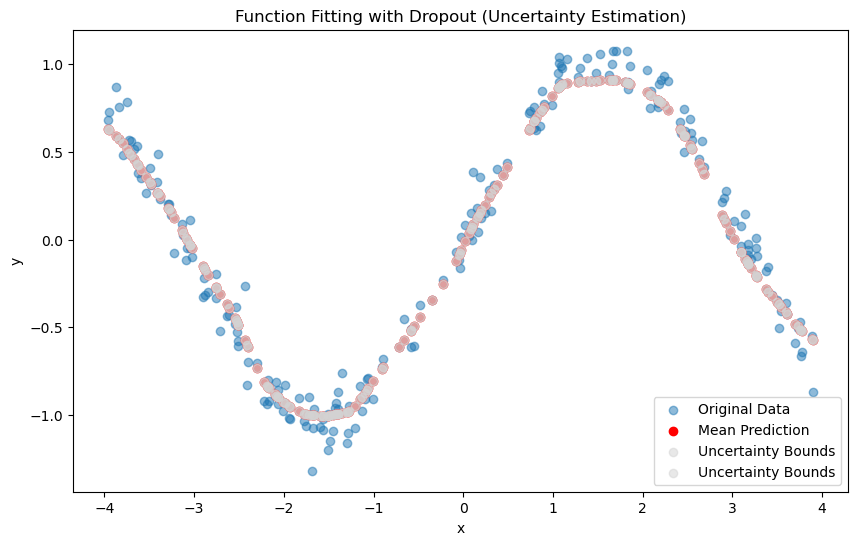

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for function fitting (more complex sine curve)
def generate_data(num_points):
    np.random.seed(42)
    x_train = np.random.uniform(-4, 4, num_points)
    y_train = np.sin(x_train) + np.random.normal(scale=0.1, size=num_points)
    x_train = x_train.reshape(-1, 1).astype(np.float32)
    y_train = y_train.reshape(-1, 1).astype(np.float32)
    return x_train, y_train

# Define a neural network architecture with dropout
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Generate synthetic data
x_train, y_train = generate_data(200)

# Create an instance of the neural network
model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(torch.from_numpy(x_train))
    loss = criterion(outputs, torch.from_numpy(y_train))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Set model to evaluation mode for dropout inference
model.eval()

# Number of Monte Carlo samples for uncertainty estimation
num_samples = 100

# Perform Monte Carlo dropout inference for uncertainty estimation
predictions = torch.zeros((num_samples, len(x_train)))
with torch.no_grad():
    for i in range(num_samples):
        predictions[i] = model(torch.from_numpy(x_train)).squeeze()

# Calculate mean and standard deviation of predictions
mean_prediction = predictions.mean(dim=0)
stddev_prediction = predictions.std(dim=0)

# Plot original data, model predictions, and uncertainty bounds
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Original Data', alpha=0.5)
plt.scatter(x_train, mean_prediction.numpy(), color='red', label='Mean Prediction')
plt.scatter(x_train.squeeze(),
                 mean_prediction.numpy() + 2 * stddev_prediction.numpy(), 
                 color='lightgray', alpha=0.5, label='Uncertainty Bounds')
plt.scatter(x_train.squeeze(), 
                 mean_prediction.numpy() - 2 * stddev_prediction.numpy(), 
                 color='lightgray', alpha=0.5, label='Uncertainty Bounds')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Fitting with Dropout (Uncertainty Estimation)')
plt.legend()
plt.show()